# Assignment 3


#  Data pre-processing


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import copy
import matplotlib.pyplot as plt
import seaborn as sns

# **Q1**



In [3]:
batch_size = 256
path = "../machine learning/data_mnist"
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)

trainset = torchvision.datasets.MNIST(path, train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(path, train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

cuda:0


In [6]:
trainset[0][0].shape

torch.Size([1, 28, 28])

In [4]:
class Net(nn.Module):
    def __init__(self):
        # TODO: initialize the neural network layers here
        super(Net, self).__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size = 3, stride = 1, padding = "same", bias = True),
            nn.ReLU(),
            nn.Conv2d(1, 32, kernel_size = 3, stride = 1, padding = "same", bias = True),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0),
        )

        self.fc = nn.Sequential(
            nn.Linear(14*14*32, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )

    def forward(self, x):
        # TODO: implement the forward path here
        out = self.conv(x)
        out = out.view(out.size(0), -1)
        out = self.fc(out)

        return x

In [ ]:
@torch.no_grad()
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item() / len(preds)

def train(trainloader, net, optimizer, criterion):
    train_loss = []
    train_acc = []
    for epoch in range(10):
        running_loss = 0.0
        running_acc = 0.0

        for i, (x, labels) in enumerate(trainloader, 0):
          x = x.to(device)
          labels = labels.to(device)
          #TODO: train the net with the given data, optimizer and criterion. 
          optimizer.zero_grad()
          outputs = net(x)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
            
          running_loss += loss.item()
          running_acc += accuracy(outputs, labels)

        average_running_loss = running_loss / len(trainloader)
        average_running_acc = 100 * running_acc / len(trainloader)
        train_loss.append(average_running_loss)
        train_acc.append(average_running_acc)
    
    return train_loss, train_acc


def test(testloader, net):
    #TODO: Test the net and return a signle test accuracy.
    
    print(f'Accuracy of the network on the test set: {test_acc:.1f} %')
    return test_acc

In [ ]:
#TODO: Train the net with Adam optimizer. 

# **Q3**


In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.datasets as datasets
from sklearn.cluster import KMeans, AgglomerativeClustering

import time

Width=427, Height=640, Depth=3


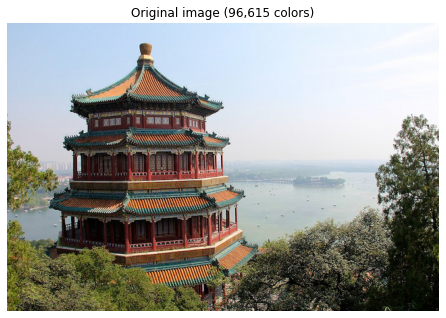

In [ ]:
china_photo = datasets.load_sample_image("china.jpg")
china_photo = np.array(china_photo, dtype=np.float64) / 255
china_w, china_h, china_d = tuple(china_photo.shape)
print("Width=%s, Height=%s, Depth=%s" % (china_w, china_h, china_d))
china_image_array = np.reshape(china_photo, (china_w * china_h, china_d))
# print("In 2-D the shape is ", china_image_array.shape)

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the codebook and labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
          #TODO: reconstruct the image
          image[i][j] = 
          label_idx += 1
    return image

plt.figure()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china_photo)

Handling k = 16
Handling k = 32
Handling k = 64
Handling k = 128


<Figure size 432x288 with 0 Axes>

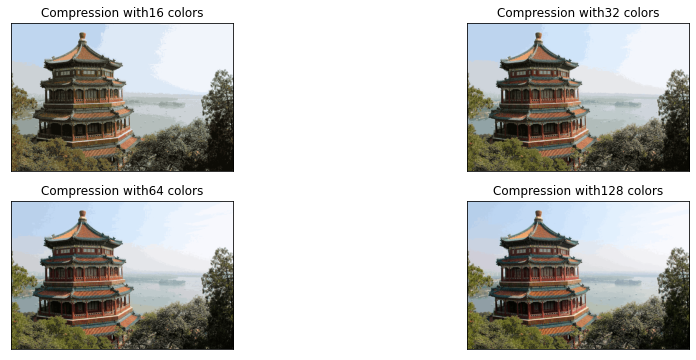

In [ ]:
plt.figure()
fig,axes = plt.subplots(2, 2, figsize=(15,6))

#the 2d is for convenience
t1h_k_values = [[16, 32], [64,128]]
for i in range(2):
    for j in range(2):
        print("Handling k =", t1h_k_values[i][j])

        #TODO: call Kmeans with k=t1h_k_values[i][j] and random_state = 1234
        t1h_kmeans_obj = None
        #TODO: fit the object with china image array variable
        t1h_kmeans_fit = None

        axes[i][j].imshow(recreate_image(t1h_kmeans_fit.cluster_centers_, t1h_kmeans_fit.labels_, china_w, china_h))
        axes[i][j].set_title('Compression with ' + str(t1h_k_values[i][j]) + " colors")
        
        axes[i][j].grid(False)
        axes[i][j].get_xaxis().set_ticks([])
        axes[i][j].get_yaxis().set_ticks([])